<a href="https://colab.research.google.com/github/bpeel26/mwc22/blob/main/nuwefruit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. CLIENT TABLE

---



##1.1. Data Cleaning/Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import pyplot
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load data
client_table = pd.read_csv("https://raw.githubusercontent.com/bpeel26/mwc22/main/mwc22-client_table.csv")
client_table

,CLIENT ID,CLIENT_SEGMENT,AVG CONSO,AVG BASKET SIZE,RECEIVED_COMMUNICATION
0,24321771,6,"67,25","201,75",0
1,24321859,2,"58,33",350,0
2,24321880,3,"46,67",112,0
3,24321957,2,50,600,0
4,24321962,4,10,120,0
...,...,...,...,...,...
35879,48345531,4,"12,5",150,1
35880,48345686,3,"37,5","112,5",1
35881,48365750,3,"41,67",125,1
35882,48365861,3,"62,58","125,17",1


In [3]:
# Check variable type
client_table.dtypes

CLIENT ID                  int64
CLIENT_SEGMENT             int64
AVG CONSO                 object
AVG BASKET SIZE           object
RECEIVED_COMMUNICATION     int64
dtype: object

In [4]:
# Format variables 
client_table["AVG CONSO"] = client_table["AVG CONSO"].str.replace(',','.')
client_table["AVG BASKET SIZE"] = client_table["AVG BASKET SIZE"].str.replace(',','.')
client_table["AVG CONSO"] = client_table["AVG CONSO"].astype(float)
client_table["AVG BASKET SIZE"] = client_table["AVG BASKET SIZE"].astype(float)
client_table.dtypes

CLIENT ID                   int64
CLIENT_SEGMENT              int64
AVG CONSO                 float64
AVG BASKET SIZE           float64
RECEIVED_COMMUNICATION      int64
dtype: object

In [5]:
# Check for NA values and overview of data
client_table.describe(include = 'all')

,CLIENT ID,CLIENT_SEGMENT,AVG CONSO,AVG BASKET SIZE,RECEIVED_COMMUNICATION
count,3.588400e+04,35884.000000,35884.000000,35884.000000,35884.000000
mean,2.706058e+07,3.123593,64.534437,181.218610,0.507998
std,8.835076e+06,1.512932,64.381932,129.604691,0.499943
min,1.807311e+07,1.000000,0.830000,10.000000,0.000000
25%,2.053311e+07,2.000000,20.830000,100.000000,0.000000
50%,2.462190e+07,3.000000,50.000000,160.000000,1.000000
75%,3.298538e+07,4.000000,88.170000,225.000000,1.000000
max,4.836594e+07,6.000000,2433.330000,3400.200000,1.000000


{'boxes': [<matplotlib.lines.Line2D at 0x7efce978c910>],
 'caps': [<matplotlib.lines.Line2D at 0x7efce9794350>,
 'fliers': [<matplotlib.lines.Line2D at 0x7efce97955d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7efce9794e10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7efce9475910>,
  <matplotlib.lines.Line2D at 0x7efce978c990>]}

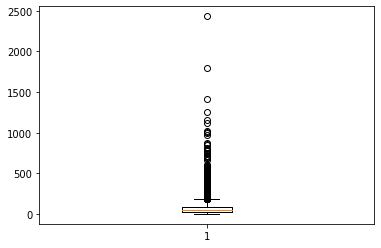

In [6]:
# Check for outliers
plt.boxplot(client_table["AVG CONSO"])

{'boxes': [<matplotlib.lines.Line2D at 0x7efce9506150>],
 'caps': [<matplotlib.lines.Line2D at 0x7efce9592c90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7efce9589c50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7efce95921d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7efce9506b10>,
  <matplotlib.lines.Line2D at 0x7efce95b5e10>]}

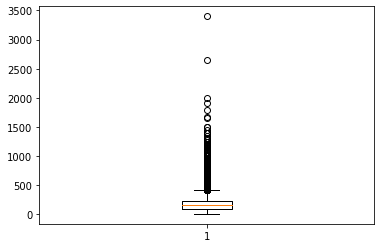

In [7]:
# Check for outliers
plt.boxplot(client_table["AVG BASKET SIZE"])

Both boxplots show 2 observations stand out from the rest. However, these are not out of the ordinary, so they are kept for the analysis.

##1.2. Exploratory Analysis

In [8]:
# 5 clients with the highest AVG BASKET SIZE
top5 = client_table["AVG BASKET SIZE"].groupby(client_table["CLIENT ID"]).max()
top5 = top5.sort_values(ascending = False)
top5.head(5)

CLIENT ID
19917710    3400.20
20939776    2654.55
22116141    2000.00
20721198    1920.00
20405483    1800.00
Name: AVG BASKET SIZE, dtype: float64

In [9]:
# 5 clients with the lowest AVG BASKET SIZE
low5 = client_table["AVG BASKET SIZE"].groupby(client_table["CLIENT ID"]).max()
top5 = top5.sort_values(ascending = False)
top5.tail(5)

CLIENT ID
47753748    10.0
24456860    10.0
24456926    10.0
42772293    10.0
24387525    10.0
Name: AVG BASKET SIZE, dtype: float64

##1.3. Skewed Data

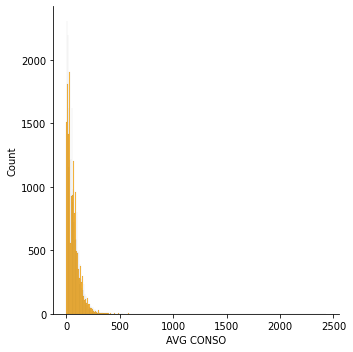

In [10]:
sns.displot(client_table["AVG CONSO"], color = "orange");

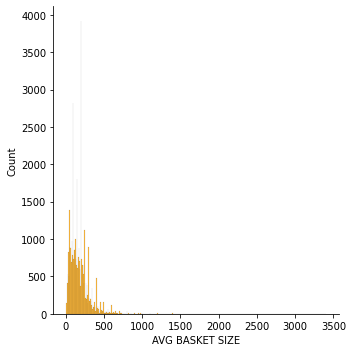

In [11]:
sns.displot(client_table["AVG BASKET SIZE"], color = "orange");

Both variables *AVG CONSO* and AVG *BASKET SIZE* seem to be skewed to the right.

##1.4. Exploring the Impact of Promotion

In [12]:
# Client per Segment by Promotion Level
fig = px.histogram(client_table, x = "CLIENT_SEGMENT", y = "AVG BASKET SIZE", color = "RECEIVED_COMMUNICATION",
            title = "Client per Segment by Promotion Level",
            width = 600, height = 400,
            color_discrete_map = { # replaces default color mapping by value
                "O": "Blue", "1": "Yellow"
            },
            template = "simple_white")
fig.show()

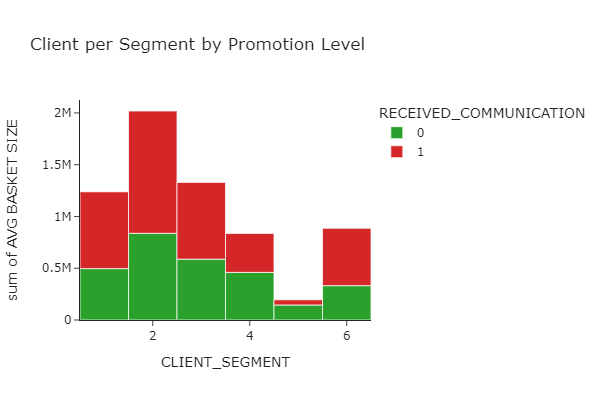

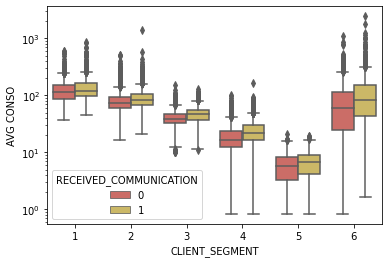

In [13]:
# Set color
sns.set_palette("hls", 8)

# Plot boxlot
sns.boxplot(x = "CLIENT_SEGMENT", y = "AVG CONSO", hue = "RECEIVED_COMMUNICATION", data = client_table)
pyplot.yscale('log')
pyplot.show()

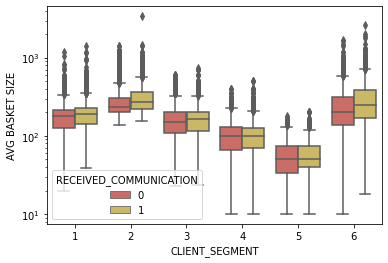

In [14]:
sns.boxplot(x = "CLIENT_SEGMENT", y = "AVG BASKET SIZE", hue = "RECEIVED_COMMUNICATION", data = client_table)
pyplot.yscale('log')
pyplot.show()

Both boxplots show that customers who have received a promotion do not perceive a significant increase in *AVG CONSO* nor in *AVG BASKET SIZE* with respect to those customers who have not. This applies to all segments.

To be even more certain, below is a correlation plot:

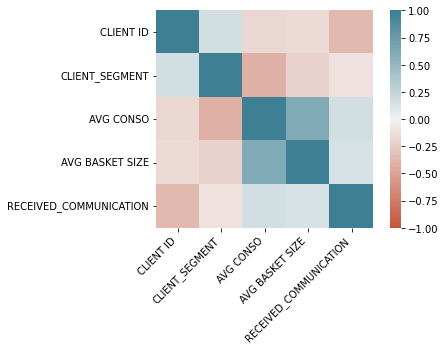

In [15]:
corr = client_table.corr()
ax = sns.heatmap(
    corr, 
    vmin = -1, vmax = 1, center = 0,
    cmap = sns.diverging_palette(20, 220, n = 200),
    square = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
);

The correlation plot leads to the same conclusion: Promotions do not have much impact on the average consumption.

#2. ORDERS TABLE

---



In [16]:
# Load data
orders_table = pd.read_csv("https://raw.githubusercontent.com/bpeel26/mwc22/main/mwc22-orders_table.csv")
orders_table

,CLIENT ID,NB PRODS,ORDER ID,FRUIT_PRODUCT
0,18070505,5,671907264,Apple
1,18070505,10,671907264,Orange
2,18070505,5,671907264,Kiwi
3,18070505,10,671907264,Pear
4,18070505,5,671907264,Cheery
...,...,...,...,...
66907,48352045,2,670065547,Pineapple
66908,48352045,1,670065547,Apple
66909,48352045,2,670065547,Watermelon
66910,48352045,1,670065547,Grape


##2.1. Cleaning Data

In [17]:
# Check for NA values and overview of data
orders_table.describe()

,CLIENT ID,NB PRODS,ORDER ID
count,6.691200e+04,66912.000000,6.691200e+04
mean,2.613407e+07,4.528112,6.722533e+08
std,8.473596e+06,5.788227,3.205826e+06
min,1.807050e+07,-80.000000,6.638335e+08
25%,2.017427e+07,1.000000,6.694803e+08
50%,2.438055e+07,3.000000,6.719971e+08
75%,2.538708e+07,5.000000,6.750893e+08
max,4.836586e+07,198.000000,6.832132e+08


In [18]:
# Check variable type
orders_table.dtypes

CLIENT ID         int64
NB PRODS          int64
ORDER ID          int64
FRUIT_PRODUCT    object
dtype: object

The following steps are simply checking the relation between the variables *ORDER ID* and *CLIENT ID*.

In [19]:
# Unique values in ORDER ID
len(np.unique(orders_table["ORDER ID"]))

17458

In [20]:
# Unique values in CLIENT ID
len(np.unique(orders_table["CLIENT ID"]))

14499

Seems that one CLIENT ID can have several order IDs, but one *ORDER ID* cannot have more than one *CLIENT ID*.

In [21]:
# Client ID with most orders
orders5 = orders_table.groupby("CLIENT ID").size()
orders5.to_frame()
orders5 = orders5.sort_values(ascending = False)
orders5.head(5)

CLIENT ID
18851598    77
34351299    50
20042062    49
20254867    49
21000466    45
dtype: int64

In [22]:
# Client ID with least orders
orders5.tail(5)

CLIENT ID
41486943    1
19485150    1
41468283    1
25234522    1
25453195    1
dtype: int64

In [23]:
# Number of clients with one order
count = sum(map(lambda x : x == 1, orders5))
count

1847

Actually, there is 12.7% of total customers in the database who has only one order. Absolute value: 1847.

In [47]:
# Most sold fruits
fig = px.histogram(orders_table, x = "NB PRODS", y = "FRUIT_PRODUCT", color = "FRUIT_PRODUCT",
            title = "Client per Segment by Promotion Level",
            width = 600, height = 400,
            template = "simple_white")

fig.show()

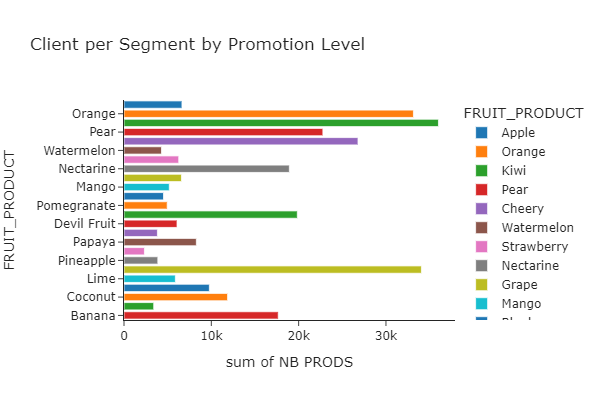

Top 3 most sold fruits:
<table>
  <tr>
    <th> Fruit </th>
    <th> Amount </th>
  </tr>
  <tr>
    <td> Kiwi </td>
    <td> 36,011k </td>
  </tr>
  <tr>
    <td> Lemon </td>
    <td> 34,061k </td>
  </tr>
  <tr>
    <td> Orange </td>
    <td> 33,145k </td>
  </tr>
</table>

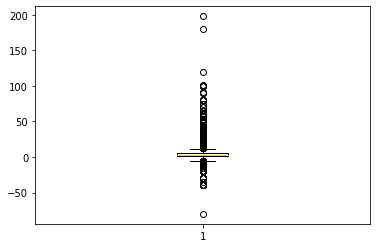

In [25]:
plt.boxplot(orders_table["NB PRODS"])
plt.show()

Two observations stand out from the rest. However, these are not out of the ordinary, so they are kept for the analysis.

#3. PREDICTION

---



In [26]:
# Load Data
pred = pd.read_csv("https://raw.githubusercontent.com/bpeel26/mwc22/main/mwc22-client_table%2B-%2Btest_x.csv")
pred

,CLIENT ID,AVG CONSO,AVG BASKET SIZE,RECEIVED_COMMUNICATION
0,48352078,"8,33",100,0
1,18072186,"93,42","186,83",1
2,48352246,"45,83","137,5",0
3,18070621,"16,67",200,1
4,48352262,"13,33",160,0
5,48359553,"16,67",200,0
6,18071647,"8,33",100,1
7,48359574,"54,17","162,5",0
8,48359627,"26,67","106,67",0
9,18070505,"166,67","333,33",1


##3.1. Data Cleaning/Preparation

In [27]:
# Replace commas for dots to enable the analysis
pred["AVG CONSO"] = pred["AVG CONSO"].str.replace(',','.')
pred["AVG BASKET SIZE"] = pred["AVG BASKET SIZE"].str.replace(',','.')
pred

,CLIENT ID,AVG CONSO,AVG BASKET SIZE,RECEIVED_COMMUNICATION
0,48352078,8.33,100,0
1,18072186,93.42,186.83,1
2,48352246,45.83,137.5,0
3,18070621,16.67,200,1
4,48352262,13.33,160,0
5,48359553,16.67,200,0
6,18071647,8.33,100,1
7,48359574,54.17,162.5,0
8,48359627,26.67,106.67,0
9,18070505,166.67,333.33,1


In [28]:
# Convert str to float
pred["AVG CONSO"] = pred["AVG CONSO"].astype(float)
pred["AVG BASKET SIZE"] = pred["AVG BASKET SIZE"].astype(float)
pred.dtypes

CLIENT ID                   int64
AVG CONSO                 float64
AVG BASKET SIZE           float64
RECEIVED_COMMUNICATION      int64
dtype: object

Variable *CLIENT ID* does not contribute to the prediction model since the training model's goal is to understand general patters. *CLIENT ID* does not provide the model any real insight into what drives to each *CLIENT_SEGMENT*.

Therefore, the below step of taking the independent variables, *CLIENT ID* is left out.

In [29]:
# Separate the dependent variable from the independent ones
x = client_table[["AVG CONSO", "AVG BASKET SIZE", "RECEIVED_COMMUNICATION"]]  # Features
y = client_table["CLIENT_SEGMENT"]  # Labels
x 

,AVG CONSO,AVG BASKET SIZE,RECEIVED_COMMUNICATION
0,67.25,201.75,0
1,58.33,350.00,0
2,46.67,112.00,0
3,50.00,600.00,0
4,10.00,120.00,0
...,...,...,...
35879,12.50,150.00,1
35880,37.50,112.50,1
35881,41.67,125.00,1
35882,62.58,125.17,1


In [30]:
# Duplicate prediction data
pred2 = pred

In [31]:
# Eliminate variable CLIENT ID
pred = pred.drop("CLIENT ID", axis = 1)
pred

,AVG CONSO,AVG BASKET SIZE,RECEIVED_COMMUNICATION
0,8.33,100.00,0
1,93.42,186.83,1
2,45.83,137.50,0
3,16.67,200.00,1
4,13.33,160.00,0
5,16.67,200.00,0
6,8.33,100.00,1
7,54.17,162.50,0
8,26.67,106.67,0
9,166.67,333.33,1


In [32]:
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 25)
print('Training Data Shape:', x_train.shape)
print('Training Labels Shape:', x_test.shape)
print('Testing Data Shape:', y_train.shape)
print('Testing Labels Shape:', y_test.shape)

Training Data Shape: (28707, 3)
Training Labels Shape: (7177, 3)
Testing Data Shape: (28707,)
Testing Labels Shape: (7177,)


##3.2. Logistic Regression

In [33]:
lr_clf = LogisticRegression(random_state = 25)
lr_clf._estimator_type = "classifier"
lr_model = cross_val_score(LogisticRegression(), 
                            x_train, y_train,
                            scoring = 'accuracy',
                            cv = 3,
                            n_jobs = -1,
                            verbose = 1)
lr_model

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    8.6s finished


array([0.64374543, 0.59922667, 0.6431184 ])

##3.3. Decision Tree Classifier

In [34]:
tree_clf = DecisionTreeClassifier()
tree_clf._estimator_type = "classifier"
tree_model = cross_val_score(tree_clf, 
                            x_train, y_train,
                            scoring = 'accuracy',
                            cv = 3,
                            n_jobs = -1,
                            verbose = 1)

# Train the model 
tree_clf.fit(x_train, y_train)
tree_pred = tree_clf.predict(x_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, tree_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuracy: 0.7585342064929637


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.4s finished


##3.4. Random Forest Classifier

In [35]:
#Create Classifier
rf_clf = RandomForestClassifier(n_estimators = 1000, random_state = 25)
rf_clf._estimator_type = "classifier"

#Train the model using the training sets y_pred=clf.predict(X_test)
rf_clf.fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, rf_pred))

Accuracy: 0.7625748920161628


###3.4.1. Important features

In this section, the relevance score of each feature in the training phase is computed.

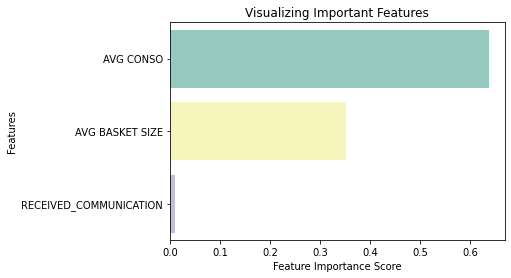

In [36]:
feature_imp = pd.Series(rf_clf.feature_importances_, index = x_train.columns).sort_values(ascending = False)

# Creating a bar plot
sns.barplot(x = feature_imp, y = feature_imp.index, palette = "Set3")

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [37]:
# Split dataset into features and labels
x2 = client_table[["AVG CONSO", "AVG BASKET SIZE"]] # Removed feature ""RECEIVED_COMMUNICATION""
y2 = client_table["CLIENT_SEGMENT"]                   
                    
# Split dataset into training set and test set
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 25) # 80% training and 20% test

In [38]:
# Create Classifier
rf_clf2 = RandomForestClassifier(n_estimators = 1000, random_state = 25)

# Train the model 
rf_clf2.fit(x2_train, y2_train)

# Prediction on test set
rf_pred2 = rf_clf2.predict(x2_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y2_test, rf_pred2))

Accuracy: 0.7480841577260694


It seems that by eliminating the least important independent variable *RECEIVED_COMMUNICATION*, the accuracy of the model has decreased.


##3.5. Voting Classifier

The *Voting Clasiffier* uses 2 out of 3 models computed: *Decision Tree* and *Random Forest*. This is due to the low accuracy rate of the *Logistic Regression* model.

In [39]:
# Create Classifier
vot_clf = VotingClassifier(estimators = [("tree", tree_clf), ("rf", rf_clf)], voting = "soft")

# Train the model
vot_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('tree', DecisionTreeClassifier()),
                             ('rf',
                              RandomForestClassifier(n_estimators=1000,
                                                     random_state=25))],
                 voting='soft')

In [40]:
# Predict using the given data
pred["CLIENT_SEGMENT"] = vot_clf.predict(pred)
pred_id = pred2["CLIENT ID"]

In [46]:
# Join Client ID and results
submission = pd.concat([pred_id, pred], axis = 1)
submission = submission[["CLIENT ID", "CLIENT_SEGMENT"]]
submission.to_csv("results.csv", index = False)